# Clustering Assignment:
## Problem 1: Determine the initial value of the center point
- create code that determines initial value of $K$ center points $\mu_1$ to $\mu_k$ from input data. where $K$ is the specified no. of clusters.

In [39]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [5]:
myu = X[np.random.choice(len(X), size = K, replace = False)] # myu is a variabe that stores the centroids, X is the data points,K is the number of clusters 

## Problem 2: Create a function to find SSE
- Write a function that computes the sum of squared errors(SSE) within a cluster.
- SSE formula:
$$
SSE = \sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}||X_{n} - \mu_{k}||^2
$$
where:

$n$ : data point index

$k$ : cluster index

$X_n$ : $n$th data point

$\mu_k$ : $k$th center point

$r_{nk}$ : 1 if data point $X_n$ belongs to cluster $k$, 0 otherwise

In [ ]:
def calc_sse(X): # function to calculate sse
    sse = 0 # initialize sse
    for i in range(len(X)): # iterating through the data points
        for j in range(K): # iterating through the clusters
            if j == X[i, -1]: # last element of ith sample which represent its cluster assignment
                sse += np.sum((X[i,-1] - myu[j])**2) # myu is the  center point
            
    

## Problem 3: Allocation to a Cluster
- Write code that assigns data points $X_{n}$ to nearest center point $\mu_k$

In [ ]:
for i in range(len(x)): # iterating through the data points
    dist-m = 10**20 # initialize distance between ith sample and center point
    for j in range(K): # iterating through clusters where K is the number of clusters
        dist = np.sum(np.linalg.norm(x[i,-1] - myu[j])) # sum the euclidean distance between the samples and centroid
        if dist<dist-m: # if the distance is less than the initial distance
            dist-m = dist # set the distance as the new initial distance
            x[i, -1] = j # compare the index of jth centroid to ith sample

## Question 4: Moving the center point
- write code that moves center point$\mu_k$ to the mean(centroid) of all data points $ X_n$ assigned to $K$th cluster.

In [ ]:
for j in range(K): #where K is the number of clusters
    myu[j] = np.mean(X[X[:,-1]==j, :-1], axis=0)
    """
    The expression X[:,-1] == j creates a boolean array that is True for each sample
    in X that is assigned to cluster j and False for all other samples.
    
    The expression X[X[:,-1]==j, :-1] uses boolean array to select the subset of rows
    from X that are assigned to cluster j and excludes the last column.
    """ 

## Question 5: Repetition
- Write a code that learns by repeatedly assigning clusters and moving center points
- Stop this if any of the following conditions are met:

1. Repetition reaches the specified number of times. (Argument max_iter in the template)
2. The sum of the difference between the center point $\mu_k$ and the centroid is less than or equal to the specified tolerance. (Argument tol in the template)


In [2]:
# first we will start by combining above code to create a class ScratchKMeans()

class ScratchKmeans():
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose = False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.best_sse = 10**20
        
    def fit(self, X):
        for i in range(self.n_init):
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
        for j in range(self.max_iter):
            self.calc_sse(X_cluster)
            self._update_cluster(X_cluster)
            self._update_myu(X_cluster)
            if self.verbose:
                print("Initialization：%s　Learning times：%s　Best SSE：%s"%(i,j,self.best_sse))
            if self.best_sse_diff <= self.tol:
                break
        
    
    def calc_sse(self,X):
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2)
        if self.best_sse > sse:
            self.best_sse_diff = self.best_sse - sse
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
            
    def _update_cluster(self,X):
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.n_clusters):
                dist = np.sum(np.linalg.norm(x[i,-1] - myu[j]))
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j
                    
                    
    def _update_myu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)
            
            
            
        

## Question 6: Calculation with different initial values
- Create a code that calculates the iteration of problem 5 by changing the initial value for the specified number of times

In [25]:
# first we will start by combining above code to create a class ScratchKMeans()

class ScratchKmeans():
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose = False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.best_sse = 10**20
        
    def fit(self, X):
        for i in range(self.n_init):
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
        for j in range(self.max_iter):
            self.calc_sse(X_cluster)
            self._update_cluster(X_cluster)
            self._update_myu(X_cluster)
            if self.verbose:
                print("Initialization：%s　Learning times：%s　Best SSE：%s"%(i,j,self.best_sse))
            if self.best_sse_diff <= self.tol:
                break
        
    
    def calc_sse(self,X):
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2)
        if self.best_sse > sse:
            self.best_sse_diff = self.best_sse - sse
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
            
    def _update_cluster(self,X):
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.n_clusters):
                dist = np.sum(np.linalg.norm(x[i,-1] - myu[j]))
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j
                    
                    
    def _update_myu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)
            
            

## Question 7: Presumption
- Assign data points $X_n$ to the nearest $\mu_k$.

In [4]:
# function to predict the cluster which new data belongs to
def predict(self, X):
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.record_cluster):# cluster that minimizes SSE
            dist = np.sum(np.linalg.norm(x[i,-1] - myu[j])) 
            if dist < dist_m:
                dist_m = dist
                y_pred[i] = j # y_pred - cluster estimation of the data
    return y_pred

In [26]:
# fully completed kmeans clustering from scratch code
class ScratchKMeans():
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose = False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.best_sse = 10**20
        
    def fit(self, X):
        for i in range(self.n_init):
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
        for j in range(self.max_iter):
            self.calc_sse(X_cluster)
            self._update_cluster(X_cluster)
            self._update_myu(X_cluster)
            if self.verbose:
                print("Initialization：%s　Learning times：%s　Best SSE：%s"%(i,j,self.best_sse))
            if self.best_sse_diff <= self.tol:
                break
        
    
    def calc_sse(self,X):
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2)
        if self.best_sse > sse:
            self.best_sse_diff = self.best_sse - sse
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
            
    def _update_cluster(self,X):
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.n_clusters):
                dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j
                    
                    
    def _update_myu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)
            
    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            dist_m = 10**20
        for j in range(self.record_cluster):# cluster that minimizes SSE
            dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
            if dist < dist_m:
                dist_m = dist
                y_pred[i] = j # y_pred - cluster estimation of the data
        return y_pred

In [27]:
# loading artificial dummy dataset from the scratch course 
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [44]:
X_train, X_valid = train_test_split(X,train_size=0.8,random_state=None)

In [45]:
clf = ScratchKMeans(n_clusters=4,n_init=5,max_iter=100,tol = 1e-4, verbose=False)
clf.fit(X_train)

In [48]:
pred = clf.predict(X_valid)
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 2.])

## Problem 8: Implementation of elbow method
- In K-means, the number of center points $k$ has to be determined artificially, and there is an elbow method as a determination method. Write code to consider the number of center points $k$ by the elbow method.

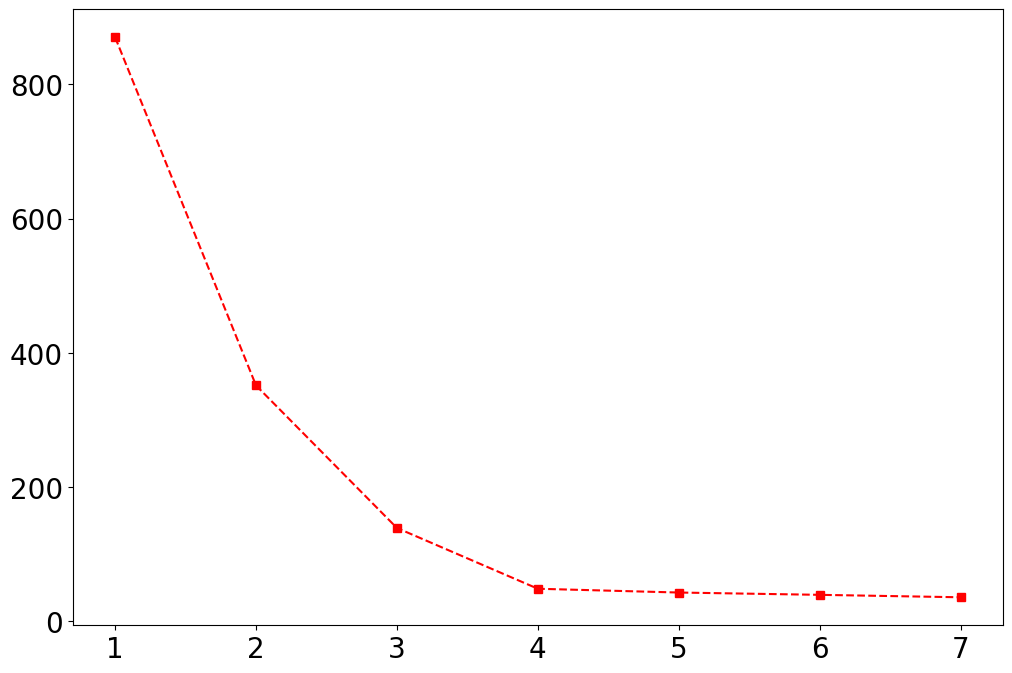

In [49]:
elbow = {} # dictionary called elbow is created
for k in range(1,8): # a loop from k=1 to k=7
    model = ScratchKMeans(n_clusters=k,n_init=5,max_iter=100,tol = 1e-4, verbose=False) #ScratchKMeans algorithm is created
    model.fit(X)
    elbow[k] = model.best_sse # best sse attribute of the model is added to elbow dictionary
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

## Question 9: (Advanced task) Silhouette Diagram
- There is also a silhouette diagram to help determine $k$. Write the code to display the silhouette figure.

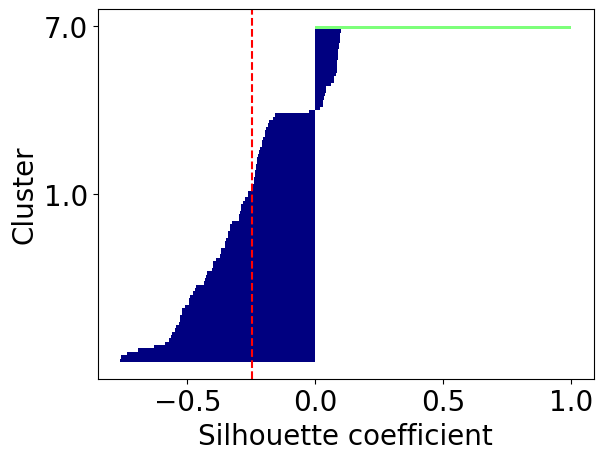

In [50]:
from matplotlib import cm
model1 = ScratchKMeans(n_clusters=k,n_init=5,max_iter=100,tol = 1e-4, verbose=False)
model1.fit(X)
y_km = model1.predict(X)
cluster_labels = np.unique(y_km)
n_clusters = len(np.unique(y_km))
n_samples = X.shape[0]
silhouette_vals = np.zeros(n_samples)
for i in range(n_samples):
        a_i = np.mean(np.linalg.norm(X[y_km == y_km[i]] - X[i], axis=1))
        b_i = np.min([np.mean(np.linalg.norm(X[y_km == j] - X[i], axis=1)) for j in np.unique(y_km) if j!= y_km[i]])
        silhouette_vals[i] = ((b_i - a_i) / max(a_i, b_i))
silhouette_avg = np.mean(silhouette_vals)
   
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## Problem 10: Selecting the number of clusters k
- We will use wholesale customer data from UCL Machine Learning Repository.
1. <u> Dimensionality Reduction </u>
- There are 6 features related to money, but we will reduce the dimension for visualization. We will use PCA.

In [16]:
# import 
import pandas as pd
data = pd.read_csv('Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [51]:
# PCA Sample code
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.45961362 0.86478588 0.93481596 0.97883941 0.99386152 1.
 1.         1.        ]


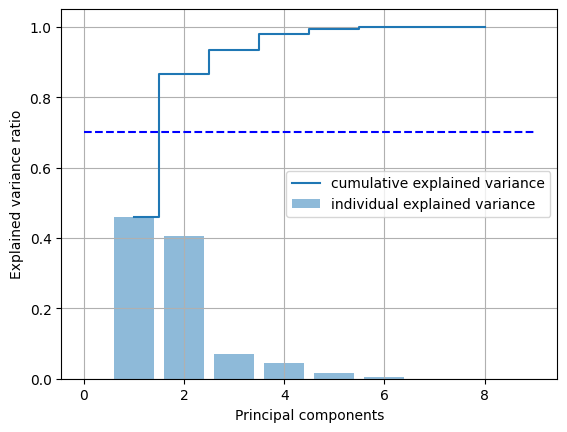

In [7]:
# code sample for displaying the variance explanation rate of PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,9), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 9,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

- Selecting the optimal number of clusters using the elbow method
- We will use dimensionally reduced data from PCA code

In [100]:
X = data_pca

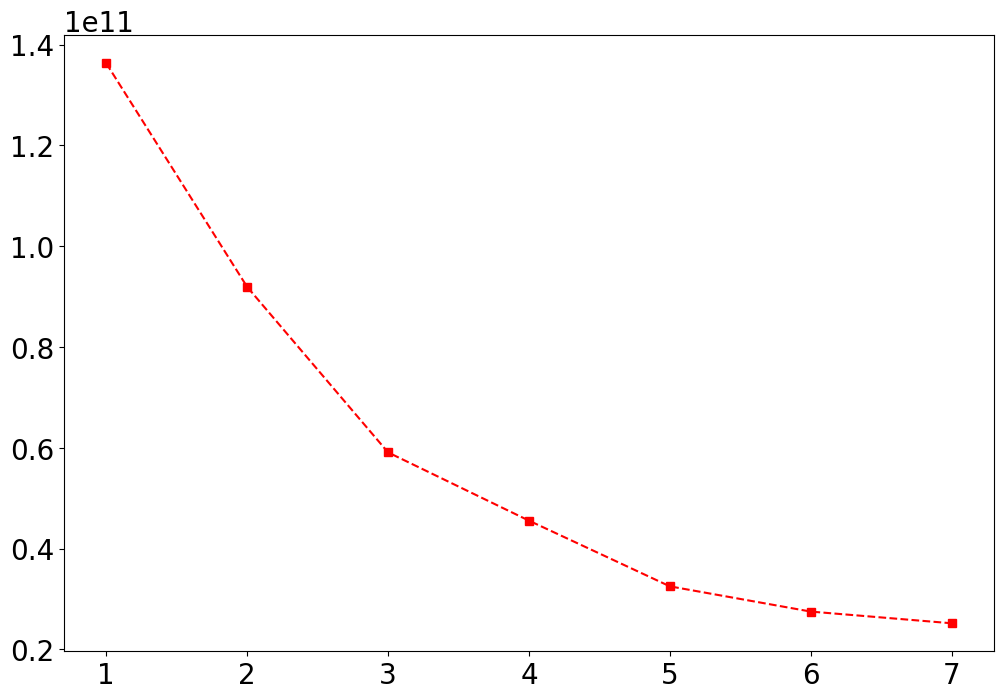

In [56]:
# elbow method code
elbow = {} # dictionary called elbow is created
for k in range(1,8): # a loop from k=1 to k=7
    model = ScratchKMeans(n_clusters=k,n_init=5,max_iter=100,tol = 1e-4, verbose=False) #ScratchKMeans algorithm is created
    model.fit(X)
    elbow[k] = model.best_sse # best sse attribute of the model is added to elbow dictionary
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

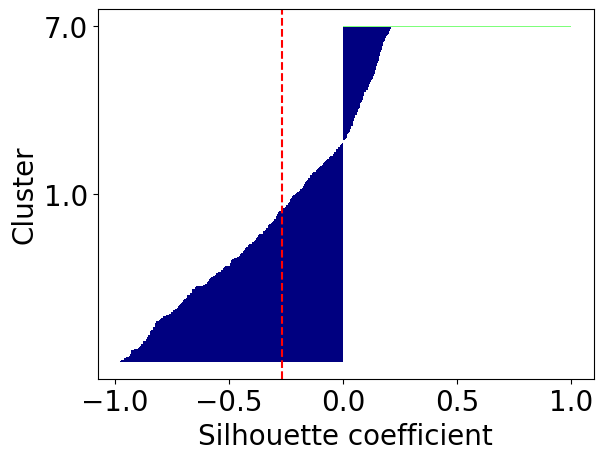

In [57]:
#using silhouette diagram method
from matplotlib import cm
model1 = ScratchKMeans(n_clusters=k,n_init=5,max_iter=100,tol = 1e-4, verbose=False)
model1.fit(X)
y_km = model1.predict(X)
cluster_labels = np.unique(y_km)
n_clusters = len(np.unique(y_km))
n_samples = X.shape[0]
silhouette_vals = np.zeros(n_samples)
for i in range(n_samples):
        a_i = np.mean(np.linalg.norm(X[y_km == y_km[i]] - X[i], axis=1))
        b_i = np.min([np.mean(np.linalg.norm(X[y_km == j] - X[i], axis=1)) for j in np.unique(y_km) if j!= y_km[i]])
        silhouette_vals[i] = ((b_i - a_i) / max(a_i, b_i))
silhouette_avg = np.mean(silhouette_vals)
   
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

- using the third selection on how people want to use it.
- Let's say that the purpose of this analysis is to "analyze customer information, understand the characteristics of good customers and customers, and utilize them in the development of future measures." If you divide into too many clusters, you will not be able to deploy effective measures due to lack of manpower.

- Therefore, we decide to perform the analysis with 4 clusters this time


## Problem 11: Comparison with known groups
- Region and Channel did not use for K-means, but these are known groups. Please review and explain how clusters differ from these well-known groups. Visualize each one first

In [101]:
clf = ScratchKMeans(n_clusters=4,n_init=5,max_iter=100,tol = 1e-4, verbose=False)
clf.fit(X)
pred = clf.predict(X)
summary_df = pd.DataFrame({'pred':pred, 'Region':data['Region'],'Channel':data['Channel'],})

In [102]:
# comparison with region
pd.pivot_table(summary_df, index='Region', columns='pred',values='Channel', aggfunc=len)

pred,0.0,1.0
Region,,
1,77.0,NaN
2,47.0,NaN
3,315.0,1.0


In [103]:
# comparison with channel
pd.pivot_table(summary_df, index='Channel', columns='pred',values='Region', aggfunc=len)

pred,0.0,1.0
Channel,,
1,297.0,1.0
2,142.0,NaN


## Question 12: Useful information for wholesalers
- Find out useful information for wholesalers and summarize it in a sentence.

In [104]:
# First, the original data is given classified clusters.
data['cluster'] = pred

In [105]:
# Then groupby explores the characteristics of each cluster.
data.groupby('cluster').agg(['mean'])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,
0.0,1.323462,2.542141,12021.284738,5805.601367,7963.671982,3078.781321,2886.970387,1528.225513
1.0,1.000000,3.000000,2787.000000,1698.000000,2510.000000,65.000000,477.000000,52.000000


In [106]:
# a better defined example
data.groupby(['Channel','Region','cluster']).agg(['mean','max','min'])

Fresh                        Milk               \
                                mean     max   min          mean    max   min   
Channel Region cluster                                                          
1       1      0.0      12902.254237   56083   514   3870.203390  23527   258   
        2      0.0      11650.535714   32717     3   2304.250000  16784   333   
        3      0.0      13930.866667  112151     3   3495.500000  43950    55   
               1.0       2787.000000    2787  2787   1698.000000   1698  1698   
2       1      0.0       5200.000000   20782    18  10784.000000  28326  2527   
        2      0.0       7289.789474   27082   161   9190.789474  25071   928   
        3      0.0       9831.504762   44466    23  10981.009524  73498  1124   

                             Grocery                    Frozen              \
                                mean    max   min         mean    max  min   
Channel Region cluster                                                       
1       1      0.0       4026.135593  16966   489  3127.322034  18711   91   
        2      0.0       4395.500000  13626  1330  5745.035714  60869  264   
        3      0.0       3893.290476  21042     3  3674.004762  36534   25   
               1.0       2510.000000   2510  2510    65.000000     65   65   
2       1      0.0      18471.944444  39694  5265  2584.111111   8321   61   
        2      0.0      16326.315789  67298  2743  1540.578947  11559  131   
        3      0.0      15953.809524  92780  4523  1513.200000   8132   33   

                       Detergents_Paper               Delicassen              
                                   mean    max  min         mean    max  min  
Channel Region cluster                                                        
1       1      0.0           950.525424   5828    5  1197.152542   6854    7  
        2      0.0           482.714286   1679   15  1105.892857   5609   51  
        3      0.0           788.157143   6907    3  1525.266667  47943    3  
               1.0           477.000000    477  477    52.000000     52   52  
2       1      0.0          8225.277778  19410  788  1871.944444   6372  120  
        2      0.0          8410.263158  38102  332  1239.000000   3508   59  
        3      0.0          6899.238095  40827  523  1826.209524  16523    3

- From the above results we can deduce that:
1. Cluster 0: Low Milk/Grocery.
2. Cluster 1: High Fresh/Frozen.

- Therefore, it is possible to consider that measures should be developed to encourage customers in each cluster to consume items with low consumption.

## Question 13:(Advanced assignment) Investigation of other methods

- In addition to K-means, which we dealt with this time, DBSCAN is a well-known method for non-hierarchical clustering, and t-SNE and LLE are well-known methods for dimensionality reduction besides PCA .

<b><u> DBSCAN </u><b>
    
    - Density Based Spatial Clustering of Application with Noise is a clustering algorithm used to group together data points that are close to each other in a high dimensional space
    
- <b>Advantages</b>
    1. Useful in datasets where the clusters are irregularly shaped and of varying densities
    2. Efficient for large datasets as it does not require any prior knowledge about the number of clusters in the data
   
    
- <b>Disadvantages</b>
    1. It requires the specification of two parameters: the radius parameter and the density parameter.Selecting appropriate values for these parameters can be challenging, particularly when the data is high-dimensional or when the density of the clusters varies widely.
    
    
<b><u> t - SNE </u><b>
    
    - t- Distributed Stochastic Neighbour Embedding is a machine learning algorithm commonly used for visualizing high dimensional datasets in a lower dimensional space.

- <b>Advantages</b> 
    1. Effective at preserving the structure of data
    2. Flexible it can handle both symmetric and asymmetric similarities
    3.Scalable - its possible to apply to large datasets
    
- <b>Disadvantages</b>
    1. Computationally intensive
    2. Sensitive to hyperparameters
    3. Non-deterministic - running the algorithm multiple times on the same data may result in different low-dimensional representations. This can make it difficult to compare results across different runs of the algorithm.
    
<b><u> LLE </u><b>
    
    - Local Linear Embedding is a machine learning algorithm used for dimensionality reduction and data visualization.The algorithm achieves this by first identifying the local neighborhood of each data point, and then finding a linear combination of the neighbors that best approximates the data point. This linear combination is then used to construct a low-dimensional representation of the data.
    
- <b>Advantages</b>
    1. Effective at preserving the local structure of the data
    2. Can handle non-linear relationship between the data points
    3. Robust to noise in the data and can handle missing data
    
- <b>Disadvantages</b>
    1. Sensitive to hyperparameters
    2. Computationally intensive

## Problem 14:(Advanced assignment) Use of t-SNE and DBSCAN

In [110]:
from sklearn.manifold import TSNE
X = data.values
X_embedded = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(X)
X_embedded.shape

(440, 2)

In [121]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
clusters = dbscan.fit_predict(X_embedded)

In [123]:
from sklearn.metrics import silhouette_score
if len(set(clusters)) > 1:
    score = silhouette_score(X_embedded, clusters)
    print("Silhouette score:", score)
else:
    print("Only one cluster found.")

Only one cluster found.


In [124]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2.5, min_samples = 4)
clusters = dbscan.fit_predict(X_embedded)

In [125]:
from sklearn.metrics import silhouette_score
if len(set(clusters)) > 1:
    score = silhouette_score(X_embedded, clusters)
    print("Silhouette score:", score)
else:
    print("Only one cluster found.")

Silhouette score: -0.07734821


- from the above results its clear that changing the hyperparameters return completely different results, its very important to fine tune hyperparameters